In [1]:
from Code.utils import CremaD

In [2]:
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 3
CMD = CremaD(path="./dataset/test/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
dataset = CMD.getData()
dataset

,Path,Emotions
0,./dataset/test/1066_IOM_DIS_XX.wav,disgust
1,./dataset/test/1045_ITS_FEA_XX.wav,fear
2,./dataset/test/1041_MTI_DIS_XX.wav,disgust
3,./dataset/test/1063_IWW_DIS_XX.wav,disgust
4,./dataset/test/1068_WSI_HAP_XX.wav,happy
...,...,...
1484,./dataset/test/1072_MTI_SAD_XX.wav,sad
1485,./dataset/test/1063_IWW_HAP_XX.wav,happy
1486,./dataset/test/1089_DFA_ANG_XX.wav,angry
1487,./dataset/test/1079_TIE_SAD_XX.wav,sad


In [3]:
CMD = CremaD(path="./dataset/test/1066_IOM_DIS_XX.wav", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)
waveform, emotion = CMD.getWaveform()
print(waveform.shape)
print(emotion)

(66150,)
<class 'str'>


In [6]:
dataset["Emotions"].value_counts()

fear       255
disgust    254
happy      254
sad        254
angry      254
neutral    218
Name: Emotions, dtype: int64

# Train Test Data Split

In [5]:
# Data splitting
from sklearn.model_selection import train_test_split
import pandas as pd
X = dataset.drop(columns=["Emotions"])
y = dataset["Emotions"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

test = pd.concat([X_test, y_test], axis=1)
train = pd.concat([X_train, y_train], axis=1)
print(f"Test Set Data : {len(test)}")
print(test["Emotions"].value_counts())
print(f"Train Set Data : {len(train)}")
print(train["Emotions"].value_counts())

Test Set Data : 1489
fear       255
happy      254
sad        254
angry      254
disgust    254
neutral    218
Name: Emotions, dtype: int64
Train Set Data : 5953
5953
angry      1017
disgust    1017
happy      1017
sad        1017
fear       1016
neutral     869
Name: Emotions, dtype: int64


In [6]:
# Move data
import os
import shutil

# List of filenames to move
test_list = test["Path"].tolist()
test_list = [i.split('/')[2] for i in test_list]
train_list = train["Path"].tolist()
train_list = [i.split('/')[2] for i in train_list]
# Source directory where the files are currently located
source_dir = './dataset/'
# Destination directory where the files will be moved to
dest_dir = './dataset/test/'
dest_dir2 = './dataset/train/'

# Loop through the file list and move each file to the destination directory
for x in test_list:
    if os.path.isfile(source_dir + x):
        shutil.move(source_dir + x, dest_dir)
        print(f"Moved {x} to {dest_dir}")
    else:
        print(f"{x} does not exist in {source_dir}")

for x in train_list:
    if os.path.isfile(source_dir + x):
        shutil.move(source_dir + x, dest_dir2)
        print(f"Moved {x} to {dest_dir2}")
    else:
        print(f"{x} does not exist in {source_dir}")

Moved 1046_MTI_HAP_XX.wav to ./dataset/test/
Moved 1008_IEO_SAD_HI.wav to ./dataset/test/
Moved 1077_IEO_FEA_LO.wav to ./dataset/test/
Moved 1080_MTI_ANG_XX.wav to ./dataset/test/
Moved 1038_ITS_NEU_XX.wav to ./dataset/test/
Moved 1055_DFA_DIS_XX.wav to ./dataset/test/
Moved 1017_IWW_DIS_XX.wav to ./dataset/test/
Moved 1058_DFA_ANG_XX.wav to ./dataset/test/
Moved 1034_IWW_HAP_XX.wav to ./dataset/test/
Moved 1088_IWW_HAP_XX.wav to ./dataset/test/
Moved 1027_WSI_DIS_XX.wav to ./dataset/test/
Moved 1080_IOM_NEU_XX.wav to ./dataset/test/
Moved 1082_MTI_ANG_XX.wav to ./dataset/test/
Moved 1051_TSI_HAP_XX.wav to ./dataset/test/
Moved 1036_IEO_DIS_LO.wav to ./dataset/test/
Moved 1072_ITS_SAD_XX.wav to ./dataset/test/
Moved 1023_IWW_DIS_XX.wav to ./dataset/test/
Moved 1016_TAI_NEU_XX.wav to ./dataset/test/
Moved 1002_MTI_HAP_XX.wav to ./dataset/test/
Moved 1022_MTI_FEA_XX.wav to ./dataset/test/
Moved 1044_TAI_HAP_XX.wav to ./dataset/test/
Moved 1051_IEO_DIS_MD.wav to ./dataset/test/
Moved 1002

# Exploritory Data Analysis

<Axes: title={'center': 'Emotion Count'}, xlabel='Emotions', ylabel='Count'>

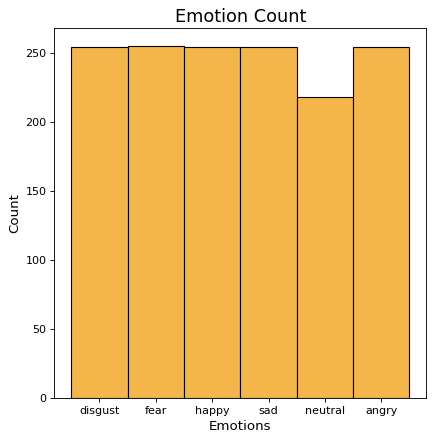

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# counting audio categorized by emotions
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count", size=16)
plt.xlabel('Emotions', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(dataset.Emotions, color='#F19C0E')

AudioMetaData(sample_rate=16000, num_frames=40040, num_channels=1, bits_per_sample=16, encoding=PCM_S)


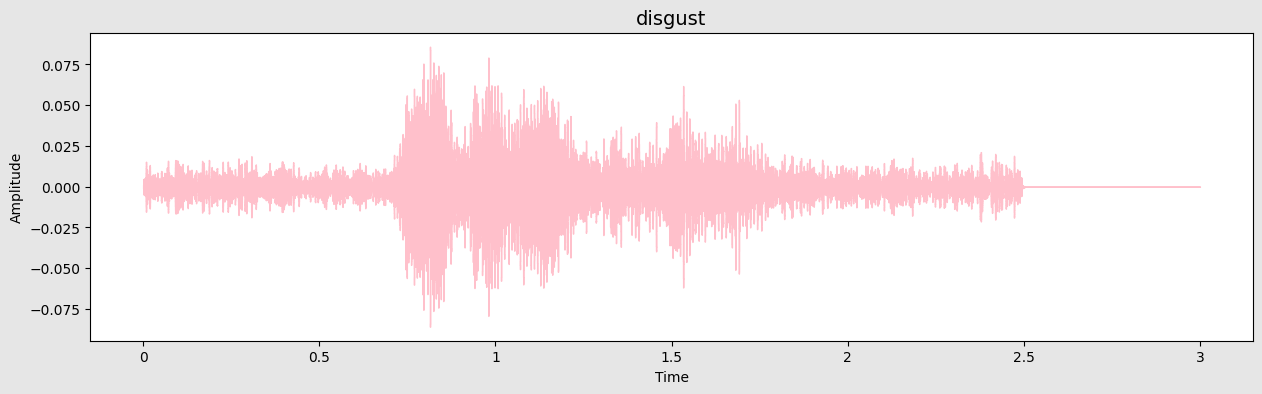

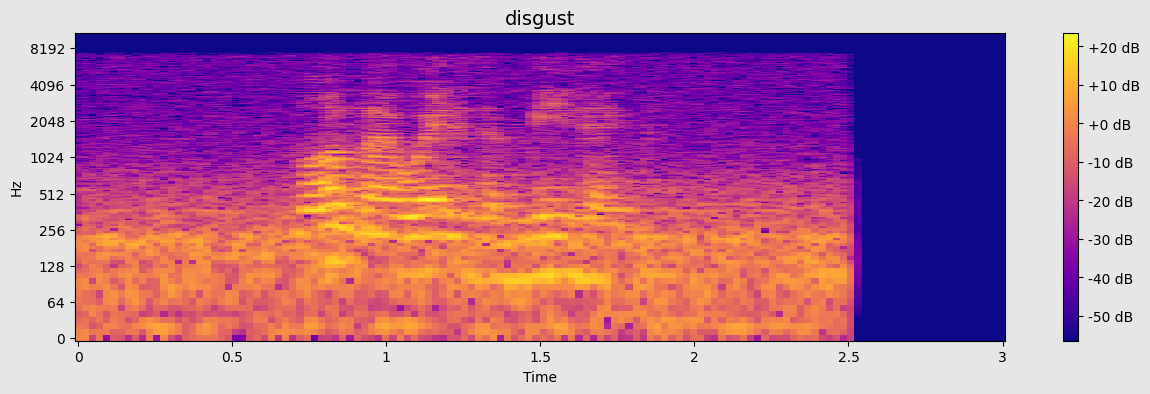

In [2]:
from Code.utils import CremaD
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 3
CMD = CremaD(path="./dataset/test/1066_IOM_DIS_XX.wav", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)

CMD.audio_info()
CMD.play_audio()
CMD.plot_waveform()
CMD.plot_spectogram()

# Feature Extraction

### Deep Learning Features

Waveforms:
 Processed 1/1 waveforms(20, 87)


Features set: 1 total, 1 samples
Features (MFC coefficient matrix) shape: 20 mel frequency coefficients x 87 time steps


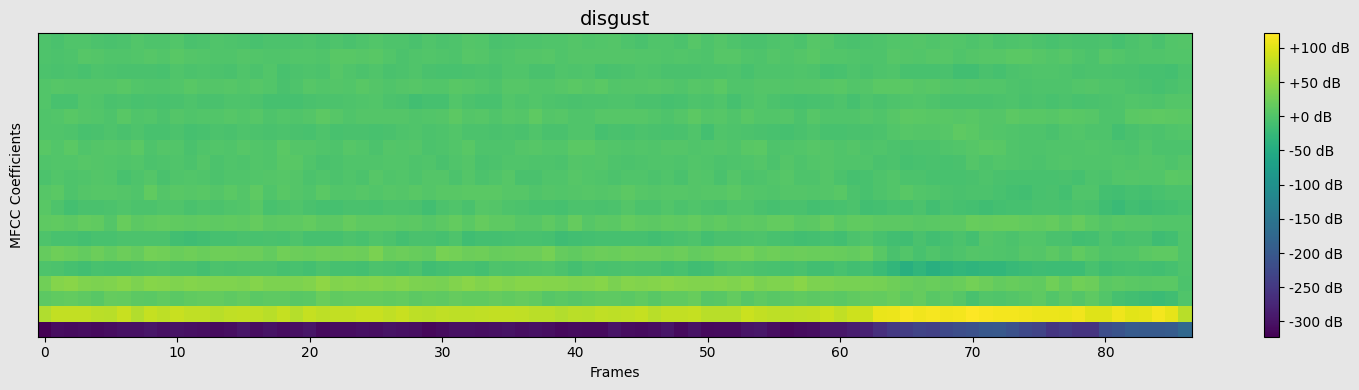

In [1]:
from Code.utils import CremaD
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 3
CMD = CremaD(path="./dataset/test/1066_IOM_DIS_XX.wav", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)

CMD.plot_mfcc()

### Conventional ML Features

In [1]:
from Code.utils import CremaD
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 3
CMD = CremaD(path="./dataset/test/", sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE)

fitur = CMD.extract_audio_svm()
fitur

 Processed 1489/1489 audio samples

Waveforms:
 Processed 1489/1489 waveforms

Features set: 1489 total samples
Features (MFC coefficient matrix) shape: 20 mel frequency coefficients x 87 time steps


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Emotions
0,-282.446874,86.747506,8.805048,31.090328,-11.372614,15.696249,-7.921764,10.736570,-6.061301,1.029511,...,-1.324079,0.679760,-3.801703,3.003914,-4.685487,1.861100,-4.729170,1.241180,-2.529538,disgust
1,-286.952071,79.330970,6.298986,35.224241,-6.948295,16.813970,-9.569064,7.626939,-5.446028,3.854530,...,-1.879965,1.181629,-4.941727,3.365156,-4.551719,2.643493,-4.371576,0.941982,-2.039317,fear
2,-274.528508,81.742533,8.466990,34.416299,-7.093453,15.180189,-11.132041,9.099867,-3.798880,1.339422,...,0.724186,3.028441,-3.859174,2.761142,-4.768444,1.816730,-4.480630,0.691952,-3.131965,disgust
3,-268.605037,91.609599,4.405649,24.957010,-9.422604,10.773126,-10.071717,2.658098,-6.661304,3.022622,...,-0.688525,3.215005,-3.624548,2.691143,-4.998108,0.618254,-3.681408,-0.646967,-1.868003,disgust
4,-204.679714,78.821564,-2.007714,28.262171,-10.517255,6.955346,-5.067487,2.016571,-9.805895,3.286028,...,-1.649307,1.225864,-5.925170,3.029965,-2.356703,0.381213,-2.567340,2.397873,-3.287248,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,-286.582538,78.132893,13.649043,37.068702,-4.458256,13.442480,-5.727338,7.025951,-6.252280,0.808008,...,-3.429168,1.507874,-3.331738,2.028659,-4.997538,1.595727,-4.185902,-0.577636,-2.259754,sad
1485,-235.897725,82.458572,1.566254,23.738321,-2.403612,6.314556,-7.157721,0.994948,-6.689059,1.451826,...,-3.553846,1.526978,-3.749928,0.800556,-8.100783,-2.442449,-2.901631,-2.680758,-4.281327,happy
1486,-171.741093,54.683290,-13.506633,24.958477,-14.049312,11.021267,-11.764190,6.014084,-6.031220,-2.700882,...,0.116845,-0.008618,-5.552813,-1.686372,-7.736534,-3.833080,-10.248274,1.167339,-0.016240,angry
1487,-287.292126,78.746189,5.229250,38.190922,-7.601717,18.688152,-11.972842,11.526861,-4.795244,3.140345,...,-1.310035,1.824291,-3.761619,3.009635,-6.578764,3.028052,-4.195071,-0.109763,-2.248086,sad


# SVM Model

In [5]:
import pandas as pd
def manual_label_encoder(data):
    mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
    if type(data) == pd.core.series.Series:
        encoded_data = data.map(mapping)
    else:
        encoded_data = [mapping[i] for i in data]

    return encoded_data

def reverse_label_encoder(data):
    mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
    reverse_mapping_dict = {v: k for k, v in mapping.items()}
    return [reverse_mapping_dict[label] for label in data]

In [6]:
import joblib
from sklearn.metrics import confusion_matrix
from Code.utils import CremaD

test_path = "./dataset/test/"
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 3

scaler = joblib.load("./Scaler/Z-ScoreScaler.joblib")
test_data = CremaD(path=test_path, sample_rate=SAMPLE_RATE, duration=DURATION, num_samples=NUM_SAMPLE).extract_audio_svm()

test_data['Emotions'] = manual_label_encoder(test_data['Emotions'])

X_test = test_data.drop(labels='Emotions', axis= 1)
y_test = test_data['Emotions']

X_test_scaled = scaler.transform(X_test)

# Load the model from file
loaded_model = joblib.load('./ML_Model/svm_model.sav')
y_pred = loaded_model.predict(X_test_scaled)

y_test_str = reverse_label_encoder(y_test)
y_pred_str = reverse_label_encoder(y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str)


 Processed 1489/1489 audio samples

Waveforms:
 Processed 1489/1489 waveforms

Features set: 1489 total samples
Features (MFC coefficient matrix) shape: 20 mel frequency coefficients x 87 time steps


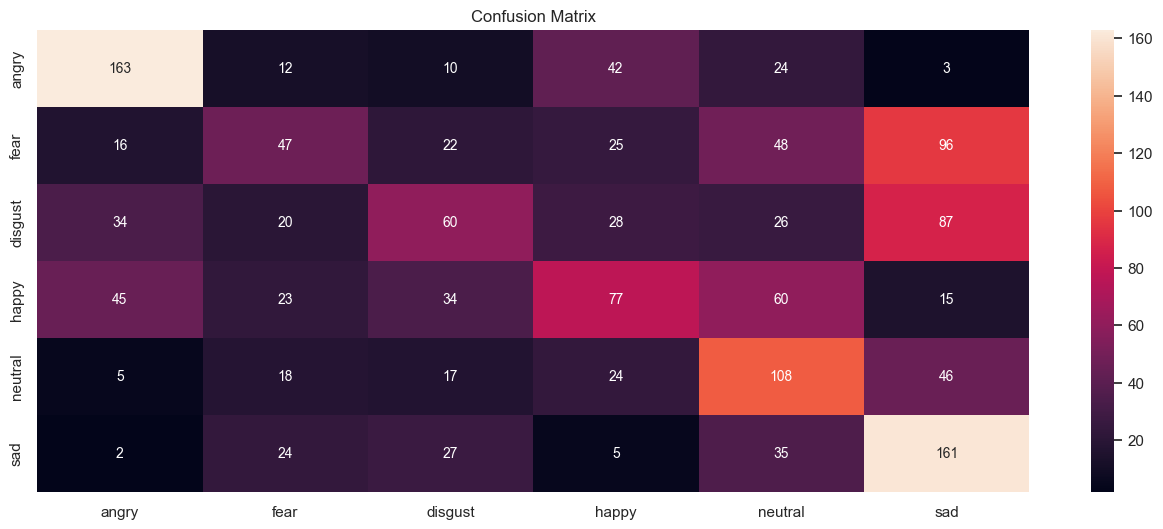

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# set labels for matrix axes from emotions
emotion_list = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad']

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(cm, index=emotion_list, columns=emotion_list)

# plot confusion matrices
plt.figure(figsize=(16,6))
sns.set(font_scale=1)
plt.title('Confusion Matrix')
sns.heatmap(confmatrix_df, annot=True, annot_kws={"size": 10}, fmt="d")

plt.show()

In [3]:
from Code.utils import load_model

load_model("./dataset/test/1089_DFA_ANG_XX.wav", "svm_model.sav").getModelPrediction()



Waveforms:
 Processed 1/1 waveforms

Features set: 1 total samples
Features (MFC coefficient matrix) shape: 20 mel frequency coefficients x 87 time steps


{'angry': 0.5705708707112546,
 'fear': 0.2293807907221524,
 'disgust': 0.06654654756975298,
 'happy': 0.1253780248895165,
 'neutral': 0.0016741382726412882,
 'sad': 0.006449627834682187}

# CNN Model

In [1]:
from Code.utils import CremaD
from Code.utils import Transformation
from Code.cnn import CNNNetwork
from torch.utils.data import DataLoader
from torch import nn
import torch
import librosa
import numpy as np

In [2]:
sample_rate = 22050
def feature_melspectrogram(
    waveform, 
    sample_rate,
    fft = 1024,
    winlen = 512,
    window='hamming',
    hop=256,
    mels=128,
    ):
    melspectrogram = librosa.feature.melspectrogram(
        y=waveform, 
        sr=sample_rate, 
        n_fft=fft, 
        win_length=winlen, 
        window=window, 
        hop_length=hop, 
        n_mels=mels, 
        fmax=sample_rate/2)
    melspectrogram = librosa.power_to_db(melspectrogram, ref=np.max)
    
    return melspectrogram


In [2]:
#################### LOAD DATA ####################
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
DURATION = 3

testing_data = CremaD(path="./dataset/test/", sample_rate=SAMPLE_RATE, num_samples=NUM_SAMPLE, duration=DURATION)
training_data = CremaD(path="./dataset/train/", sample_rate=SAMPLE_RATE, num_samples=NUM_SAMPLE, duration=DURATION)
waveforms_testing, emotions_testing = testing_data.getWaveform()
waveforms_training, emotions_training = training_data.getWaveform()

 Processed 5953/5953 audio samples

In [3]:
print(f'Testing Waveforms set: {len(waveforms_testing)} samples')
# we have 1440 waveforms but we need to know their length too; should be 3 sec * 22.50k = 66150
print(f'Testing Waveform signal length: {len(waveforms_testing[0])}')
print(f'Testing Emotions set: {len(emotions_testing)} sample labels')
print("\n")
print(f'Training Waveforms set: {len(waveforms_training)} samples')
# we have 1440 waveforms but we need to know their length too; should be 3 sec * 22.50k = 66150
print(f'Training Waveform signal length: {len(waveforms_training[0])}')
print(f'Training Emotions set: {len(emotions_training)} sample labels')

Testing Waveforms set: 1489 samples
Testing Waveform signal length: 66150
Testing Emotions set: 1489 sample labels


Training Waveforms set: 5953 samples
Training Waveform signal length: 66150
Training Emotions set: 5953 sample labels


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
#################### SPLIT TRAIN TEST VALIDATION ####################
# convert waveforms to array for processing
waveforms_testing = np.array(waveforms_testing, dtype=np.float64)
emotions_testing = np.array(emotions_testing, dtype=int)
waveforms_training = np.array(waveforms_training, dtype=np.float64)
emotions_training = np.array(emotions_training, dtype=int)

X_train, X_valid, y_train, y_valid = train_test_split(waveforms_training, emotions_training, test_size=0.2, random_state=123, stratify=emotions_training)
X_test = waveforms_testing
y_test = emotions_testing
(unique_train, counts_train) = np.unique(y_train, return_counts=True)
(unique_valid, counts_valid) = np.unique(y_valid, return_counts=True)
(unique_test, counts_test) = np.unique(y_test, return_counts=True)
# check shape of each set
print(f'Training waveforms:{X_train.shape}, y_train:{y_train.shape}')
print(f'Validation waveforms:{X_valid.shape}, y_valid:{y_valid.shape}')
print(f'Test waveforms:{X_test.shape}, y_test:{y_test.shape}')
print("\n")
print(f"Train Set Data : {len(y_train)}")
print(unique_train, counts_train)
print(f"Validation Set Data : {len(y_valid)}")
print(unique_valid, counts_valid)
print(f"Test Set Data : {len(y_test)}")
print(unique_test, counts_test)

Training waveforms:(4762, 66150), y_train:(4762,)
Validation waveforms:(1191, 66150), y_valid:(1191,)
Test waveforms:(1489, 66150), y_test:(1489,)


Train Set Data : 4762
[0 1 2 3 4 5] [814 813 813 813 695 814]
Validation Set Data : 1191
[0 1 2 3 4 5] [203 203 204 204 174 203]
Test Set Data : 1489
[0 1 2 3 4 5] [254 255 254 254 218 254]


In [5]:
def feature_mfcc(waveform, sample_rate, n_mfcc = 40, fft = 1024, winlen = 512, window='hamming', mels=128):
    mfc_coefficients=librosa.feature.mfcc(
                        y=waveform, 
                        sr=sample_rate, 
                        n_mfcc=n_mfcc,
                        n_fft=fft, 
                        win_length=winlen, 
                        window=window, 
                        #hop_length=hop, 
                        n_mels=mels, 
                        fmax=sample_rate/2) 
    return mfc_coefficients


def get_features(waveforms, features, sample_rate):

    # initialize counter to track progress
    file_count = 0

    # process each waveform individually to get its MFCCs
    for waveform in waveforms:
        mfccs = feature_mfcc(waveform, sample_rate)
        features.append(mfccs)
        file_count += 1
        # print progress
        print('\r'+f' Processed {file_count}/{len(waveforms)} waveforms',end='')

    # return all features from list of waveforms
    return features

In [6]:
#################### EXTRACT FEATURES ####################
# extract MFCC features
SAMPLE_RATE=22050
features_train, features_valid, features_test = [],[],[]

print('Train waveforms:') # get training set features 
features_train = get_features(X_train, features_train, SAMPLE_RATE)

print('\n\nValidation waveforms:') # get validation set features
features_valid = get_features(X_valid, features_valid, SAMPLE_RATE)

print('\n\nTest waveforms:') # get test set features 
features_test = get_features(X_test, features_test, SAMPLE_RATE)

print(f'\n\nFeatures set: {len(features_train)+len(features_test)+len(features_valid)} total, {len(features_train)} train, {len(features_valid)} validation, {len(features_test)} test samples')
print(f'Features (MFC coefficient matrix) shape: {len(features_train[0])} mel frequency coefficients x {len(features_train[0][1])} time steps')


Train waveforms:
 Processed 4762/4762 waveforms

Validation waveforms:
 Processed 1191/1191 waveforms

Test waveforms:
 Processed 1489/1489 waveforms

Features set: 7442 total, 4762 train, 1191 validation, 1489 test samples
Features (MFC coefficient matrix) shape: 40 mel frequency coefficients x 130 time steps


In [7]:
#################### FORMAT DATA FOR TENSOR ####################
# need to make dummy input channel for CNN input feature tensor
X_train = np.expand_dims(features_train,1)
X_valid = np.expand_dims(features_valid, 1)
X_test = np.expand_dims(features_test,1)

# convert emotion labels from list back to numpy arrays for PyTorch to work with 
y_train = np.array(y_train, dtype=int)
y_valid = np.array(y_valid, dtype=int)
y_test = np.array(y_test, dtype=int)

# should print (batch, channel, width, height)
print(f'Shape of 4D feature array for input tensor: {X_train.shape} train, {X_valid.shape} validation, {X_test.shape} test')
print(f'Shape of emotion labels: {y_train.shape} train, {y_valid.shape} validation, {y_test.shape} test')

Shape of 4D feature array for input tensor: (4762, 1, 40, 130) train, (1191, 1, 40, 130) validation, (1489, 1, 40, 130) test
Shape of emotion labels: (4762,) train, (1191,) validation, (1489,) test


In [8]:
#################### FEATURE SCALING ####################
from sklearn.preprocessing import StandardScaler
import joblib
scaler = StandardScaler()


#### Scale the training data ####
BATCH,CHANNEL,WIDTH,HEIGHT = X_train.shape
X_train = np.reshape(X_train, (BATCH,-1)) 
X_train = scaler.fit_transform(X_train)
X_train = np.reshape(X_train, (BATCH,CHANNEL,WIDTH,HEIGHT))

##### Scale the validation set ####
BATCH,CHANNEL,WIDTH,HEIGHT = X_valid.shape
X_valid = np.reshape(X_valid, (BATCH,-1))
X_valid = scaler.transform(X_valid)
X_valid = np.reshape(X_valid, (BATCH,CHANNEL,WIDTH,HEIGHT))

#### Scale the test set ####
BATCH,CHANNEL,WIDTH,HEIGHT = X_test.shape
X_test = np.reshape(X_test, (BATCH,-1))
X_test = scaler.transform(X_test)
X_test = np.reshape(X_test, (BATCH,CHANNEL,WIDTH,HEIGHT))

# check shape of each set again
print(f'X_train scaled:{X_train.shape}, y_train:{y_train.shape}')
print(f'X_valid scaled:{X_valid.shape}, y_valid:{y_valid.shape}')
print(f'X_test scaled:{X_test.shape}, y_test:{y_test.shape}')

print(f"Mean: {scaler.mean_}\n")
print(f"Scale: {scaler.scale_}")
joblib.dump(scaler, './Scaler/CNNStandardScaler.joblib')


X_train scaled:(4762, 1, 40, 130), y_train:(4762,)
X_valid scaled:(1191, 1, 40, 130), y_valid:(1191,)
X_test scaled:(1489, 1, 40, 130), y_test:(1489,)
Mean: [-5.85835573e+02 -5.90416915e+02 -5.85205782e+02 ...  1.57622579e-01
  1.51344894e-01  1.24609502e-01]

Scale: [55.29115824 45.1883953  34.85677691 ...  2.19007098  2.05570669
  1.81731677]


['./Scaler/CNNStandardScaler.joblib']

In [9]:
#################### SAVE READY TO TRAIN DATA ####################
filename = './Scaler/train_ready_data.npy'
with open(filename, 'wb') as f:
    np.save(f, X_train)
    np.save(f, X_valid)
    np.save(f, X_test)
    np.save(f, y_train)
    np.save(f, y_valid)
    np.save(f, y_test)

print(f'Features and labels saved to {filename}')

Features and labels saved to ./Scaler/train_ready_data.npy


In [10]:
#################### LOAD READY TO TRAIN DATA ####################
# choose load file name 
import numpy as np
filename = './Scaler/train_ready_data.npy'
with open(filename, 'rb') as f:
    X_train = np.load(f)
    X_valid = np.load(f)
    X_test = np.load(f)
    y_train = np.load(f)
    y_valid = np.load(f)
    y_test = np.load(f)

print(f'X_train:{X_train.shape}, y_train:{y_train.shape}')
print(f'X_valid:{X_valid.shape}, y_valid:{y_valid.shape}')
print(f'X_test:{X_test.shape}, y_test:{y_test.shape}') 


X_train:(4762, 1, 40, 130), y_train:(4762,)
X_valid:(1191, 1, 40, 130), y_valid:(1191,)
X_test:(1489, 1, 40, 130), y_test:(1489,)


### Training

In [11]:
from torch import nn
# define function to create a single step of the training phase
def train_single_epoch(model, optimizer, criterion):
    
    # define the training step of the training phase
    def train_step(X,Y):  
        # forward pass
        output_logits, output_softmax = model(X)
        predictions = torch.argmax(output_softmax,dim=1)
        accuracy = torch.sum(Y==predictions)/float(len(Y))
        
        # compute loss on logits because nn.CrossEntropyLoss implements log softmax
        loss = criterion(input=output_logits, target=Y)
        # loss = criterion(output_logits, Y) 
        
        # compute gradients for the optimizer to use 
        loss.backward()
        
        # update network parameters based on gradient stored (by calling loss.backward())
        optimizer.step()
        
        # zero out gradients for next pass
        # pytorch accumulates gradients from backwards passes (convenient for RNNs)
        optimizer.zero_grad() 
        return loss.item(), accuracy*100
    return train_step

def validate_single_epoch(model, criterion):
    def validate(X,Y):
        # don't want to update any network parameters on validation passes: don't need gradient
        # wrap in torch.no_grad to save memory and compute in validation phase: 
        with torch.no_grad(): 
            # set model to validation phase i.e. turn off dropout and batchnorm layers 
            model.eval()
            # get the model's predictions on the validation set
            output_logits, output_softmax = model(X)
            predictions = torch.argmax(output_softmax,dim=1)
            # calculate the mean accuracy over the entire validation set
            accuracy = torch.sum(Y==predictions)/float(len(Y))
            # compute error from logits (nn.crossentropy implements softmax)
            loss = criterion(input=output_logits, target=Y)
            # loss = criterion(output_logits,Y)
        return loss.item(), accuracy*100, predictions
    return validate

def make_save_checkpoint(): 
    def save_checkpoint(optimizer, model, epoch, filename):
        checkpoint_dict = {
            'optimizer': optimizer.state_dict(),
            'model': model.state_dict(),
            'epoch': epoch
        }
        torch.save(checkpoint_dict, filename)
    return save_checkpoint

def load_checkpoint(optimizer, model, filename):
    checkpoint_dict = torch.load(filename)
    epoch = checkpoint_dict['epoch']
    model.load_state_dict(checkpoint_dict['model'])
    if optimizer is not None:
        optimizer.load_state_dict(checkpoint_dict['optimizer'])
    return epoch

In [24]:
from Code.cnn import CNNNetwork
import torch
#################### TRAINING LOGIC ####################
# get training set size to calculate # iterations and minibatch indices
train_size = X_train.shape[0]
minibatch = 32

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'{device} selected')

# instantiate model and move to GPU for training
model = CNNNetwork().to(device) 
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay=0.001, momentum=0.8)
# optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,factor=0.1, patience=5, verbose=True)
print('Number of trainable params: ',sum(p.numel() for p in model.parameters()))

# instantiate the checkpoint save function
save_checkpoint = make_save_checkpoint()
# instantiate the training step function 
train_step = train_single_epoch(model, optimizer, criterion)
# instantiate the validation loop function
validate = validate_single_epoch(model, criterion)

# instantiate lists to hold scalar performance metrics to plot later
train_losses = []
valid_losses = []
train_accuracy = []
valid_accuracy = []

# create training loop for one complete epoch (entire training set)
def train(optimizer, model, num_epochs, X_train, Y_train, X_valid, Y_valid):

    for epoch in range(num_epochs):
        
        # set model to train phase
        model.train()         
        
        # shuffle entire training set in each epoch to randomize minibatch order
        train_indices = np.random.permutation(train_size) 
        
        # shuffle the training set for each epoch:
        X_train = X_train[train_indices,:,:,:] 
        Y_train = Y_train[train_indices]

        # instantiate scalar values to keep track of progress after each epoch so we can stop training when appropriate 
        epoch_acc = 0 
        epoch_loss = 0
        num_iterations = int(train_size / minibatch)
        
        # create a loop for each minibatch of 32 samples:
        for i in range(num_iterations):
            
            # we have to track and update minibatch position for the current minibatch
            # if we take a random batch position from a set, we almost certainly will skip some of the data in that set
            # track minibatch position based on iteration number:
            batch_start = i * minibatch 
            # ensure we don't go out of the bounds of our training set:
            batch_end = min(batch_start + minibatch, train_size) 
            # ensure we don't have an index error
            actual_batch_size = batch_end-batch_start 
            
            # get training minibatch with all channnels and 2D feature dims
            X = X_train[batch_start:batch_end,:,:,:] 
            # get training minibatch labels 
            Y = Y_train[batch_start:batch_end] 

            # instantiate training tensors
            X_tensor = torch.tensor(X, device=device).float() 
            Y_tensor = torch.tensor(Y, dtype=torch.long,device=device)
            
            # Pass input tensors thru 1 training step (fwd+backwards pass)
            loss, acc = train_step(X_tensor,Y_tensor) 
            
            # aggregate batch accuracy to measure progress of entire epoch
            epoch_acc += acc * actual_batch_size / train_size
            epoch_loss += loss * actual_batch_size / train_size
            
            # keep track of the iteration to see if the model's too slow
            print('\r'+f'Epoch {epoch}: iteration {i}/{num_iterations}',end='')
        
        scheduler.step(epoch_loss)
        # create tensors from validation set
        X_valid_tensor = torch.tensor(X_valid,device=device).float()
        Y_valid_tensor = torch.tensor(Y_valid,dtype=torch.long,device=device)
        
        # calculate validation metrics to keep track of progress; don't need predictions now
        valid_loss, valid_acc, _ = validate(X_valid_tensor,Y_valid_tensor)
        
        # accumulate scalar performance metrics at each epoch to track and plot later
        train_losses.append(epoch_loss)
        valid_losses.append(valid_loss)
        train_accuracy.append(epoch_acc)
        valid_accuracy.append(valid_acc)
        
        # Save checkpoint of the model
        checkpoint_filename = './Checkpoint/cnnModel-{:03d}.pkl'.format(epoch)
        save_checkpoint(optimizer, model, epoch, checkpoint_filename)
        
        # keep track of each epoch's progress
        print(f'\nEpoch {epoch} --- loss:{epoch_loss:.2f}, Epoch accuracy:{epoch_acc:.2f}%, Validation loss:{valid_loss:.2f}, Validation accuracy:{valid_acc:.2f}%')

cuda selected
Number of trainable params:  50118


In [25]:
num_epochs = 500

train(optimizer, model, num_epochs, X_train, y_train, X_valid, y_valid)

Epoch 0: iteration 147/148
Epoch 0 --- loss:2.11, Epoch accuracy:27.72%, Validation loss:1.77, Validation accuracy:26.03%
Epoch 1: iteration 147/148
Epoch 1 --- loss:1.68, Epoch accuracy:32.32%, Validation loss:1.63, Validation accuracy:31.57%
Epoch 2: iteration 147/148
Epoch 2 --- loss:1.62, Epoch accuracy:34.92%, Validation loss:1.60, Validation accuracy:34.84%
Epoch 3: iteration 147/148
Epoch 3 --- loss:1.57, Epoch accuracy:37.02%, Validation loss:1.58, Validation accuracy:35.68%
Epoch 4: iteration 147/148
Epoch 4 --- loss:1.51, Epoch accuracy:37.82%, Validation loss:1.60, Validation accuracy:29.89%
Epoch 5: iteration 147/148
Epoch 5 --- loss:1.48, Epoch accuracy:40.24%, Validation loss:1.57, Validation accuracy:35.94%
Epoch 6: iteration 147/148
Epoch 6 --- loss:1.46, Epoch accuracy:40.80%, Validation loss:1.45, Validation accuracy:42.57%
Epoch 7: iteration 147/148
Epoch 7 --- loss:1.41, Epoch accuracy:42.29%, Validation loss:1.47, Validation accuracy:41.39%
Epoch 8: iteration 147/1

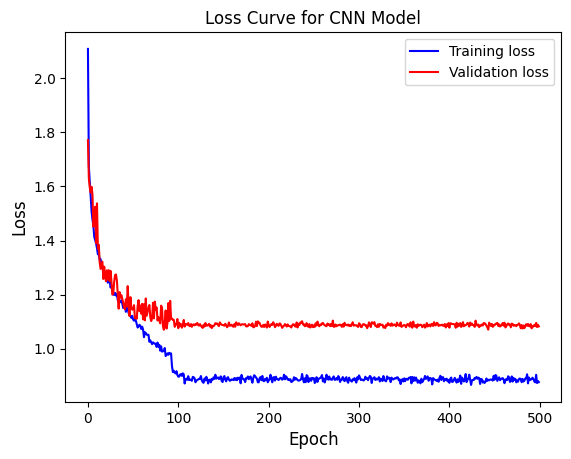

In [26]:
import matplotlib.pyplot as plt
plt.title('Loss Curve for CNN Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.plot(train_losses[:],'b')
plt.plot(valid_losses[:],'r')
plt.legend(['Training loss','Validation loss'])
plt.show()

In [21]:
# convert tensors to float values
train_accuracy = [x.detach().cpu().item() if isinstance(x, torch.Tensor) else x for x in train_accuracy]
valid_accuracy= [x.detach().cpu().item() if isinstance(x, torch.Tensor) else x for x in valid_accuracy]

[28.349435806274414, 32.48634719848633, 36.56025695800781, 37.337242126464844, 39.10121536254883, 40.655181884765625, 41.85218811035156, 43.133155822753906, 43.889137268066406, 44.8551139831543, 46.03110122680664, 45.716094970703125, 47.480072021484375, 46.78706741333008, 48.15205383300781, 47.564064025878906, 49.68501663208008, 48.866050720214844, 49.832008361816406, 50.94498062133789, 50.525001525878906, 49.91600799560547, 51.847965240478516, 52.45695495605469, 52.22596740722656, 52.51996612548828, 52.60396957397461, 52.62497329711914, 52.645957946777344, 52.2469596862793, 53.94792175292969, 54.325923919677734, 54.03191375732422, 54.745914459228516, 55.06089782714844, 54.66190719604492, 54.80892562866211, 54.64093017578125, 54.59890365600586, 55.1448974609375, 56.38386917114258, 56.36285400390625, 55.24989318847656, 56.59387969970703, 57.20283889770508, 57.034854888916016, 56.50986862182617, 56.19487380981445, 58.23183822631836, 56.90884780883789, 57.81182861328125, 58.08481216430664

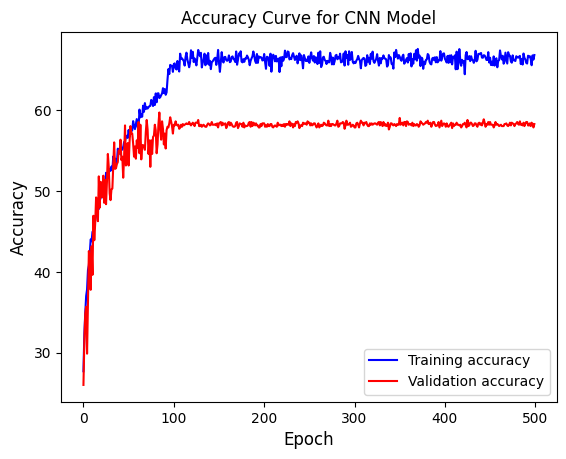

In [27]:
import matplotlib.pyplot as plt

train_accuracy = [tensor.item() for tensor in train_accuracy]
valid_accuracy = [tensor.item() for tensor in valid_accuracy]

plt.title('Accuracy Curve for CNN Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.plot(train_accuracy[:],'b')
plt.plot(valid_accuracy[:],'r')
plt.legend(['Training accuracy','Validation accuracy'])
plt.show()

### Prediction

In [40]:
from Code.cnn import CNNNetwork
import os
# pick load folder  
load_folder = './Checkpoint/'  

# pick the epoch to load
epoch = '084'
model_name = f'cnnModel-{epoch}.pkl'

# make full load path
load_path = os.path.join(load_folder, model_name)

## instantiate empty model and populate with params from binary 
model = CNNNetwork().to("cuda")
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay=0.001, momentum=0.8)
load_checkpoint(optimizer, model, load_path)

print(f'Loaded model from {load_path}')

Loaded model from ./Checkpoint/cnnModel-084.pkl


In [41]:
# reinitialize validation function with model from chosen checkpoint
criterion = nn.CrossEntropyLoss()
validate = validate_single_epoch(model,criterion)

# Convert 4D test feature set array to tensor and move to GPU
X_test_tensor = torch.tensor(X_test,device="cuda").float()
# Convert 4D test label set array to tensor and move to GPU
y_test_tensor = torch.tensor(y_test,dtype=torch.long,device="cuda")

# Get the model's performance metrics using the validation function we defined
test_loss, test_acc, predicted_emotions = validate(X_test_tensor,y_test_tensor)

print(f'Test accuracy is {test_acc:.2f}%')

Test accuracy is 58.56%


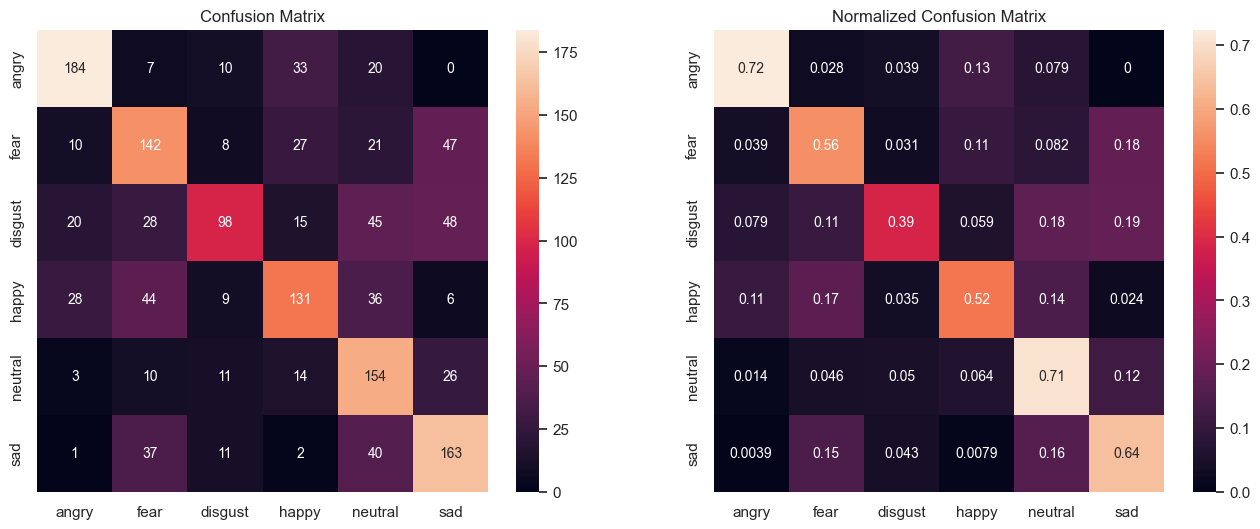

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

emotion_list = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad']
# because model tested on GPU, move prediction tensor to CPU then convert to array
predicted_emotions = predicted_emotions.to("cpu").numpy()
# use labels from test set
emotions_groundtruth = y_test

# build confusion matrix and normalized confusion matrix
conf_matrix = confusion_matrix(emotions_groundtruth, predicted_emotions)
conf_matrix_norm = confusion_matrix(emotions_groundtruth, predicted_emotions,normalize='true')

# set labels for matrix axes from emotions
emotion_names = [emotion for emotion in emotion_list]

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=emotion_names, columns=emotion_names)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=emotion_names, columns=emotion_names)

# plot confusion matrices
plt.figure(figsize=(16,6))
sns.set(font_scale=1)
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sns.heatmap(confmatrix_df, annot=True, annot_kws={"size": 10}, fmt="d")
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sns.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 10})

plt.show()

In [46]:
def feature_mfcc(waveform, sample_rate, n_mfcc = 40, fft = 1024, winlen = 512, window='hamming', mels=128):
    mfc_coefficients=librosa.feature.mfcc(
                        y=waveform, 
                        sr=sample_rate, 
                        n_mfcc=n_mfcc,
                        n_fft=fft, 
                        win_length=winlen, 
                        window=window, 
                        #hop_length=hop, 
                        n_mels=mels, 
                        fmax=sample_rate/2) 
    return mfc_coefficients


def get_features(waveforms, features, sample_rate):

    # initialize counter to track progress
    file_count = 0

    # process each waveform individually to get its MFCCs
    for waveform in waveforms:
        mfccs = feature_mfcc(waveform, sample_rate)
        features.append(mfccs)
        file_count += 1
        # print progress
        print('\r'+f' Processed {file_count}/{len(waveforms)} waveforms',end='')

    # return all features from list of waveforms
    return features

def make_prediction(model, data):
    with torch.no_grad(): 
        model.eval()
        _, output_softmax = model(data)
        return output_softmax

In [51]:
import librosa
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from Code.cnn import CNNNetwork
import os
import joblib

############################## LOAD MODEL ##############################
# pick load folder  
load_folder = './Checkpoint/'  

# pick the epoch to load
epoch = '084'
model_name = f'cnnModel-{epoch}.pkl'

# make full load path
load_path = os.path.join(load_folder, model_name)

## instantiate empty model and populate with params from binary 
model = CNNNetwork().to("cuda")
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay=0.001, momentum=0.8)
load_checkpoint(optimizer, model, load_path)

print(f'Loaded model from {load_path}')

############################## PRE-PROCESS AUDIO ##############################

features_test = []
emotion_list = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad']

audio_file = './dataset/test/1068_WSI_HAP_XX.wav'

waveform, _ = librosa.load(audio_file, duration=3, offset=0.5, sr=22050)
waveform_homo = np.zeros((int(22050*3)))
waveform_homo[:len(waveform)] = waveform

array_wave = np.array(waveform_homo, dtype=np.float64)
m = 1  # number of rows
n = array_wave.shape[0]  # number of columns
X_2d = array_wave.reshape((m, n))
print(X_2d.shape)
features_test = get_features(X_2d, features_test, 22050)

XTest = np.expand_dims(features_test,1)

scaler = joblib.load('./Scaler/CNNStandardScaler.joblib')
BATCH,CHANNEL,WIDTH,HEIGHT = XTest.shape
XTest = np.reshape(XTest, (BATCH,-1))
XTest = scaler.transform(XTest)
XTest = np.reshape(XTest, (BATCH,CHANNEL,WIDTH,HEIGHT))
print(f'Shape of 4D feature array for input tensor: {XTest.shape}')

############################## MAKE PREDICTION ##############################
X_test_tensor = torch.tensor(XTest,device="cuda").float()
predictions = make_prediction(model,X_test_tensor)

output_dict = {}
for i in range(len(emotion_list)):
    output_dict[emotion_list[i]] = predictions[0][i].item()
    
print(output_dict)

Loaded model from ./Checkpoint/cnnModel-084.pkl
(1, 66150)
 Processed 1/1 waveformsShape of 4D feature array for input tensor: (1, 1, 40, 130)
{'angry': 0.04701971262693405, 'fear': 0.010989680886268616, 'disgust': 0.2752491235733032, 'happy': 0.3609391450881958, 'neutral': 0.30475881695747375, 'sad': 0.0010434944415464997}
